In [5]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.cluster import KMeans, OPTICS, MeanShift, Birch, DBSCAN
from sklearn.neighbors import KNeighborsClassifier
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.mixture import GaussianMixture
from sklearn.exceptions import UndefinedMetricWarning
from sklearn.metrics import homogeneity_completeness_v_measure, accuracy_score
from sklearn.metrics.cluster import normalized_mutual_info_score, adjusted_rand_score, completeness_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn import linear_model
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
import time
import psutil
np.set_printoptions(precision=3, linewidth=100)
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [6]:
from pathlib import Path

def read_csv_files(folder_path):
    dfs = []  # List to store the DataFrames from each file
    path = Path(folder_path)  # Convert the folder path to a Path object
    for file in path.glob("WELL-000*.csv"):
        df = pd.read_csv(file)
        dfs.append(df)
    return dfs

def read_datasets(folder_paths):
    all_dfs = []  # List to store DataFrames from all folders
    for folder_path in folder_paths:
        dfs = read_csv_files(folder_path)
        all_dfs.extend(dfs)
    return all_dfs

In [7]:
from pathlib import Path
import pandas as pd
import os

# Specify the folder paths for the datasets you want to read
folder_paths = [
    "dataset/1",
    "dataset/2",
    "dataset/5",
    "dataset/7"
]

# Read the datasets
datasets = []
for folder_path in folder_paths:
    datasets.extend(read_csv_files(folder_path))

# Combine all datasets into one big dataset
data = pd.concat(datasets, ignore_index=True)

## Data preperation

### Clean Data: Remove Column with empty values

In [8]:
# Perform cleaning to remove columns with missing values

cleaned_data = data.dropna(axis='columns', how='all')  # Remove columns with missing values
cleaned_data = cleaned_data.dropna(axis=0)  # Remove rows with missing values
cleaned_data.isnull().sum()

timestamp     0
P-PDG         0
P-TPT         0
T-TPT         0
P-MON-CKP     0
T-JUS-CKP     0
P-JUS-CKGL    0
QGL           0
class         0
dtype: int64

In [9]:
# # Deal with timestamp

# cleaned_data['timestamp'] = pd.to_datetime(cleaned_data['timestamp'])

# # Extract components from timestamp
# cleaned_data['year'] = cleaned_data['timestamp'].dt.year
# cleaned_data['month'] = cleaned_data['timestamp'].dt.month
# cleaned_data['day'] = cleaned_data['timestamp'].dt.day
# cleaned_data['hour'] = cleaned_data['timestamp'].dt.hour
# # Extract additional components if needed

In [10]:
y_true = cleaned_data['class']
cleaned_data = cleaned_data.drop(['timestamp', 'class'], axis=1)

In [12]:
cleaned_data.head()

,P-PDG,P-TPT,T-TPT,P-MON-CKP,T-JUS-CKP,P-JUS-CKGL,QGL
0,0.0,18433410.0,116.8718,9397031.0,74.80031,-300917.8,0.0
1,0.0,18433410.0,116.8718,9397031.0,74.80031,-300917.8,0.0
2,0.0,18433410.0,116.8718,9397032.0,74.80031,-300917.8,0.0
3,0.0,18433410.0,116.8718,9397033.0,74.80031,-300917.8,0.0
4,0.0,18433410.0,116.8718,9397033.0,74.80031,-300917.8,0.0


In [11]:
y_true.value_counts()

0.0      488529
105.0    317565
107.0    282900
101.0     95658
7.0       25870
5.0       12069
1.0       10417
102.0      9307
2.0        3037
Name: class, dtype: int64

## Scaling each feature to a given range and Feature selection

In [8]:
#from sklearn.preprocessing import StandardScaler
#from sklearn.metrics import adjusted_rand_score

#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)

In [14]:
from sklearn.preprocessing import MinMaxScaler

# Define the columns to scale
# columns = [col for col in cleaned_data.columns if col not in ['timestamp','class']]

# Create an instance of MinMaxScaler
min_max = MinMaxScaler()

# Apply MinMax scaling to the specified columns
cleaned_data = min_max.fit_transform(cleaned_data)
cleaned_data = pd.DataFrame(cleaned_data)
# Print the first few rows of the scaled data
print(cleaned_data.head())


     0         1         2         3         4    5    6
0  1.0  0.004747  0.978119  0.714577  0.371816  0.0  0.0
1  1.0  0.004747  0.978119  0.714577  0.371816  0.0  0.0
2  1.0  0.004747  0.978119  0.714577  0.371816  0.0  0.0
3  1.0  0.004747  0.978119  0.714577  0.371816  0.0  0.0
4  1.0  0.004747  0.978119  0.714577  0.371816  0.0  0.0


In [15]:
# from sklearn.decomposition import PCA

# # Define the columns for PCA, excluding the 'timestamp' and 'class' columns
# pca_columns = [col for col in cleaned_data.columns if col not in ['timestamp', 'class']]

# # Create an instance of PCA with 2 components
# pca = PCA(n_components=2)

# # Apply PCA to the specified columns in the cleaned data
# X_pca = pca.fit_transform(cleaned_data[pca_columns])

# Unsupervised learning algorithm

In [18]:
# X = cleaned_data.drop('class', axis =1)
# y = cleaned_data['class'].astype('int')

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3, stratify=y, random_state=2)

# KNN - choose K

In [ ]:
error_rate = []

for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    error_rate.append(np.mean(pred != y_test))

plt.figure(figsize=(15,10))
plt.plot(range(1,50),error_rate, marker='o', markersize=9)

### Kmean:

In [19]:
from tqdm.notebook import tqdm

  0%|          | 0/10 [00:00<?, ?it/s]

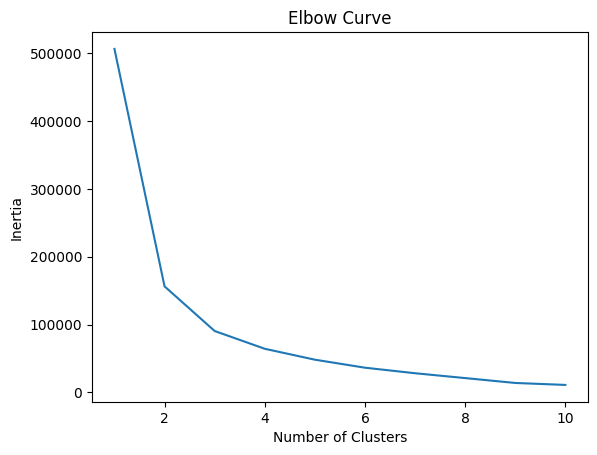

In [20]:
# Find the optimal number of clusters using the elbow method
inertia = []
max_clusters = 10  # Maximum number of clusters to test
for k in tqdm(range(1, max_clusters+1)):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(cleaned_data)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, max_clusters+1), inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.show()


In [26]:
best_k = np.array(inertia).argmin() + 1

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Initialize empty lists to store silhouette scores
silhouette_scores = []

# Define range of cluster numbers to evaluate
min_clusters = 2
max_clusters = 10

# Perform K-Means clustering for different values of n_clusters
for n_clusters in range(min_clusters, max_clusters+1):
    # Create KMeans instance
    kmeans = KMeans(n_clusters=n_clusters, random_state=None, n_init=10)
    
    # Fit and predict with K-Means
    labels = kmeans.fit_predict(cleaned_data)
    
    # Calculate silhouette score and append to the list
    silhouette_scores.append(silhouette_score(cleaned_data, labels))

# Plotting the silhouette scores
plt.figure(figsize=(10, 5))
plt.plot(range(min_clusters, max_clusters+1), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')
plt.show()

# Find the optimal number of clusters based on the maximum silhouette score
optimal_n_clusters = range(min_clusters, max_clusters+1)[silhouette_scores.index(max(silhouette_scores))]
print("Optimal Number of Clusters:", optimal_n_clusters)


In [28]:
# Perform K-means clustering with the optimal number of clusters
k = best_k # Set the optimal number of clusters here
kmeans = KMeans(n_clusters=best_k, random_state=42)
kmeans.fit(cleaned_data)
labels = kmeans.labels_

# Calculate Adjusted Rand Index (ARI)
ari = adjusted_rand_score(y_true, labels)
print("K-means Clustering Results (k={})\nARI: {:.3f}".format(k, ari))

#silhouette_avg = silhouette_score(cleaned_data, labels)
#print(f"Silhouette score: {silhouette_avg:.4f}")


K-means Clustering Results (k=10)
ARI: 0.228


<AxesSubplot:>

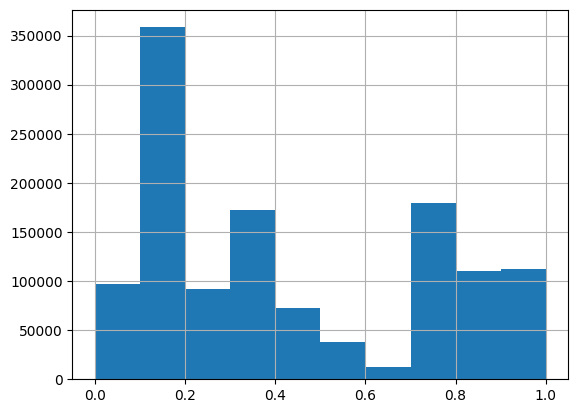

In [42]:
cleaned_data[3].hist()

In [ ]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
for c in [c for c in df.columns if df[c].dtype in numerics]:
    df[c] = np.log10(df[c])

In [45]:
c = np.log10(cleaned_data[3]) 

<AxesSubplot:>

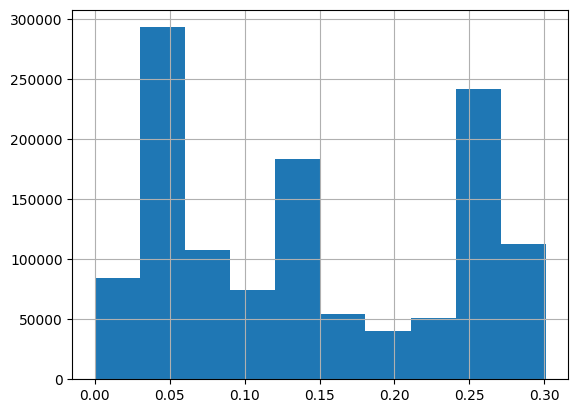

In [46]:
c.hist()

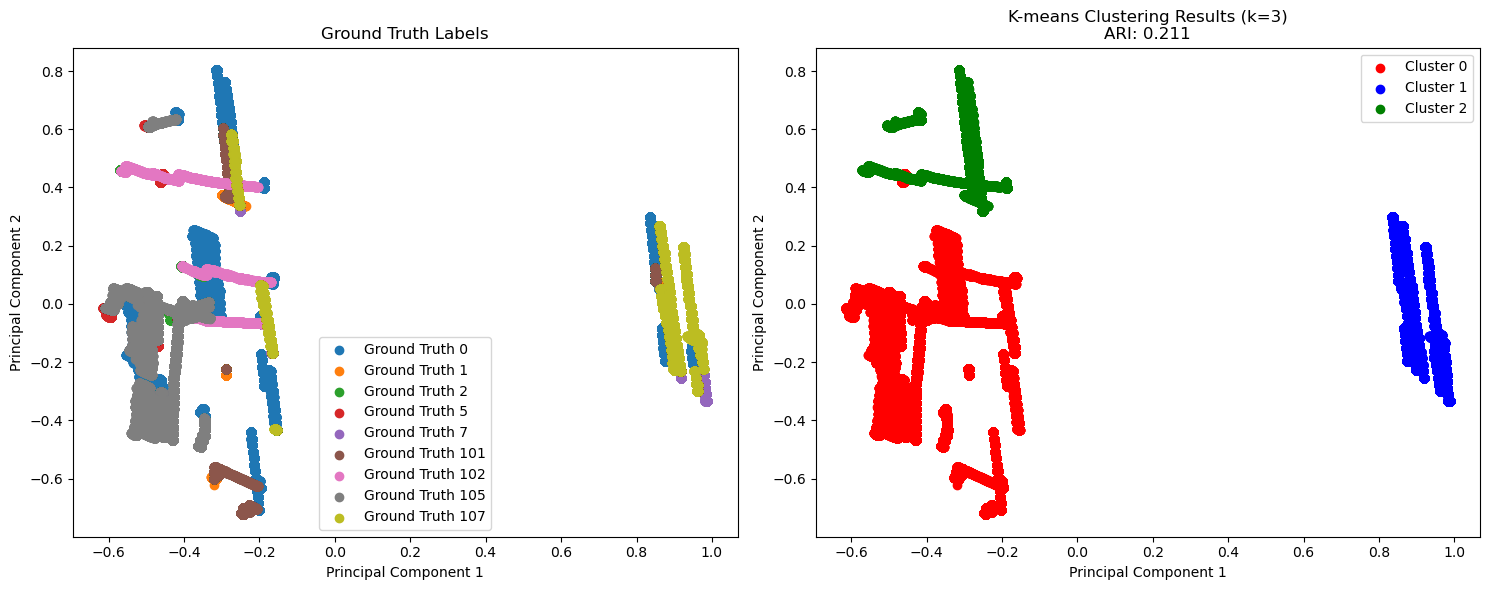

In [14]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Get unique labels in y_true
unique_labels = np.unique(y_true)

# Assign colors dynamically
color_map = plt.cm.get_cmap('tab10')

# Visualize the ground truth labels
for idx, true_label in enumerate(unique_labels):
    label_color = color_map(idx % color_map.N)
    axes[0].scatter(X_pca[y_true == true_label, 0], X_pca[y_true == true_label, 1], c=[label_color], label='Ground Truth {}'.format(int(true_label)))
axes[0].set_xlabel("Principal Component 1")
axes[0].set_ylabel("Principal Component 2")
axes[0].set_title("Ground Truth Labels")
axes[0].legend()

# Visualize the K-means clustering results
colors = ['red', 'blue', 'green', 'orange', 'cyan']
for cluster_label in range(k):
    axes[1].scatter(X_pca[labels == cluster_label, 0], X_pca[labels == cluster_label, 1], c=colors[cluster_label], label='Cluster {}'.format(cluster_label))
axes[1].set_xlabel("Principal Component 1")
axes[1].set_ylabel("Principal Component 2")
axes[1].set_title("K-means Clustering Results (k={})\nARI: {:.3f}".format(k, ari))
axes[1].legend()

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

## other

In [15]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=9, random_state=None, n_init=10)
kmeans.fit(cleaned_data)
labels = kmeans.labels_

# Calculate Adjusted Rand Index (ARI)
ari = adjusted_rand_score(y_true, labels)
print("Adjusted Rand Index:", ari)

#silhouette_avg = silhouette_score(cleaned_data, labels)
#print(f"Silhouette score: {silhouette_avg:.4f}")

Adjusted Rand Index: 0.18313111190730508


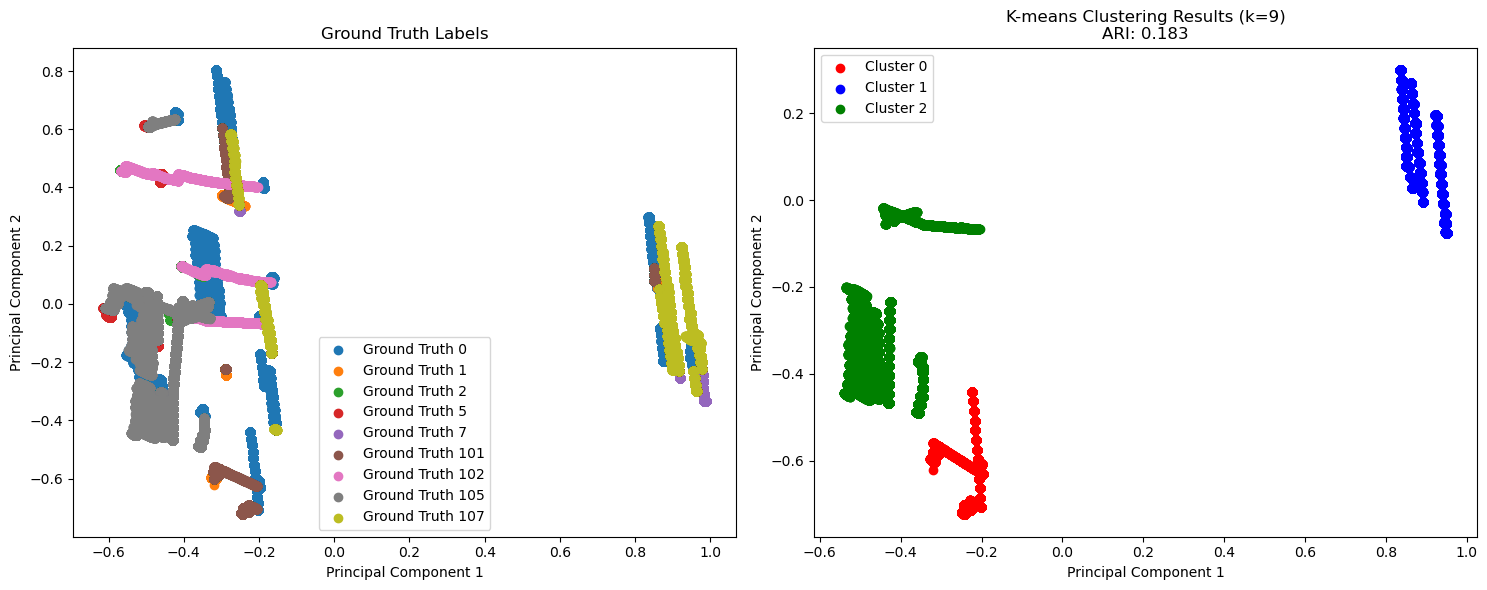

In [16]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Get unique labels in y_true
unique_labels = np.unique(y_true)

# Assign colors dynamically
color_map = plt.cm.get_cmap('tab10')

# Visualize the ground truth labels
for idx, true_label in enumerate(unique_labels):
    label_color = color_map(idx % color_map.N)
    axes[0].scatter(X_pca[y_true == true_label, 0], X_pca[y_true == true_label, 1], c=[label_color], label='Ground Truth {}'.format(int(true_label)))
axes[0].set_xlabel("Principal Component 1")
axes[0].set_ylabel("Principal Component 2")
axes[0].set_title("Ground Truth Labels")
axes[0].legend()

# Visualize the K-means clustering results
colors = ['red', 'blue', 'green', 'orange', 'cyan']
for cluster_label in range(k):
    axes[1].scatter(X_pca[labels == cluster_label, 0], X_pca[labels == cluster_label, 1], c=colors[cluster_label], label='Cluster {}'.format(cluster_label))
axes[1].set_xlabel("Principal Component 1")
axes[1].set_ylabel("Principal Component 2")
axes[1].set_title("K-means Clustering Results (k={})\nARI: {:.3f}".format("9", ari))
axes[1].legend()

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

In [17]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=4, random_state=None, n_init=10)
kmeans.fit(cleaned_data)
labels = kmeans.labels_

# Calculate Adjusted Rand Index (ARI)
ari = adjusted_rand_score(y_true, labels)
print("Adjusted Rand Index:", ari)

#silhouette_avg = silhouette_score(cleaned_data, labels)
#print(f"Silhouette score: {silhouette_avg:.4f}")

Adjusted Rand Index: 0.21200316877205974


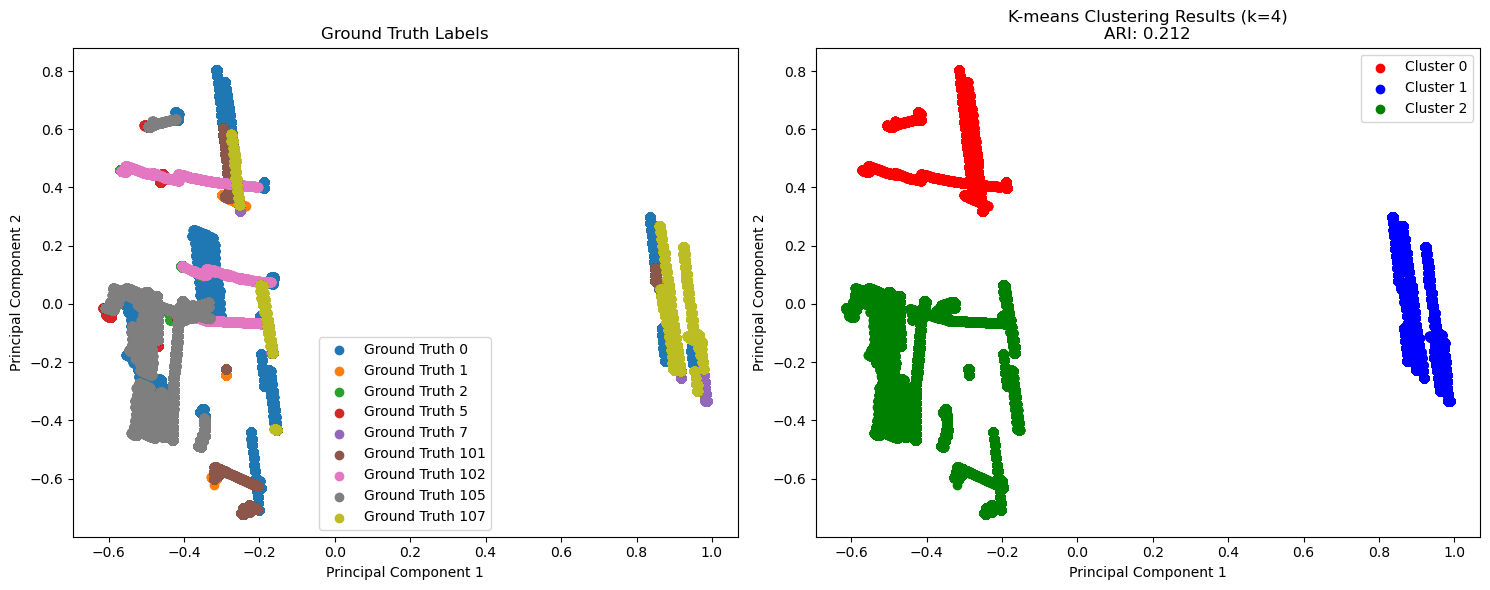

In [18]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Get unique labels in y_true
unique_labels = np.unique(y_true)

# Assign colors dynamically
color_map = plt.cm.get_cmap('tab10')

# Visualize the ground truth labels
for idx, true_label in enumerate(unique_labels):
    label_color = color_map(idx % color_map.N)
    axes[0].scatter(X_pca[y_true == true_label, 0], X_pca[y_true == true_label, 1], c=[label_color], label='Ground Truth {}'.format(int(true_label)))
axes[0].set_xlabel("Principal Component 1")
axes[0].set_ylabel("Principal Component 2")
axes[0].set_title("Ground Truth Labels")
axes[0].legend()

# Visualize the K-means clustering results
colors = ['red', 'blue', 'green', 'orange', 'cyan']
for cluster_label in range(k):
    axes[1].scatter(X_pca[labels == cluster_label, 0], X_pca[labels == cluster_label, 1], c=colors[cluster_label], label='Cluster {}'.format(cluster_label))
axes[1].set_xlabel("Principal Component 1")
axes[1].set_ylabel("Principal Component 2")
axes[1].set_title("K-means Clustering Results (k={})\nARI: {:.3f}".format("4", ari))
axes[1].legend()

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

### Gaussian Mixture

In [19]:
import numpy as np
from sklearn.mixture import GaussianMixture

# Set the range of clusters to test
min_clusters = 3
max_clusters = 6

# Initialize AIC and BIC lists
aic_scores = []
bic_scores = []

# Fit GMM models and calculate AIC and BIC for each number of clusters
for k in range(min_clusters, max_clusters+1):
    gmm = GaussianMixture(n_components=k)
    gmm.fit(cleaned_data)
    aic_scores.append(gmm.aic(cleaned_data))
    bic_scores.append(gmm.bic(cleaned_data))

# Find the optimal number of clusters based on AIC and BIC scores
optimal_k_aic = np.argmin(aic_scores) + min_clusters
optimal_k_bic = np.argmin(bic_scores) + min_clusters

# Print the optimal number of clusters
print("Optimal number of clusters (AIC):", optimal_k_aic)
print("Optimal number of clusters (BIC):", optimal_k_bic)


Optimal number of clusters (AIC): 6
Optimal number of clusters (BIC): 6


In [20]:
from sklearn.mixture import GaussianMixture

# Perform Gaussian Mixture clustering with the optimal number of clusters
k = optimal_k_aic  # Set the optimal number of clusters here
gmm = GaussianMixture(n_components=k, random_state=42)
gmm.fit(cleaned_data)
labels = gmm.predict(cleaned_data)
# Calculate Adjusted Rand Index (ARI)
ari = adjusted_rand_score(y_true, labels)

print ("Gaussian Mixture Clustering Results (k={})\nARI: {:.3f}".format(k, ari))


#silhouette_avg = silhouette_score(cleaned_data, labels)
#print(f"Silhouette score: {silhouette_avg:.4f}")

Gaussian Mixture Clustering Results (k=6)
ARI: 0.279


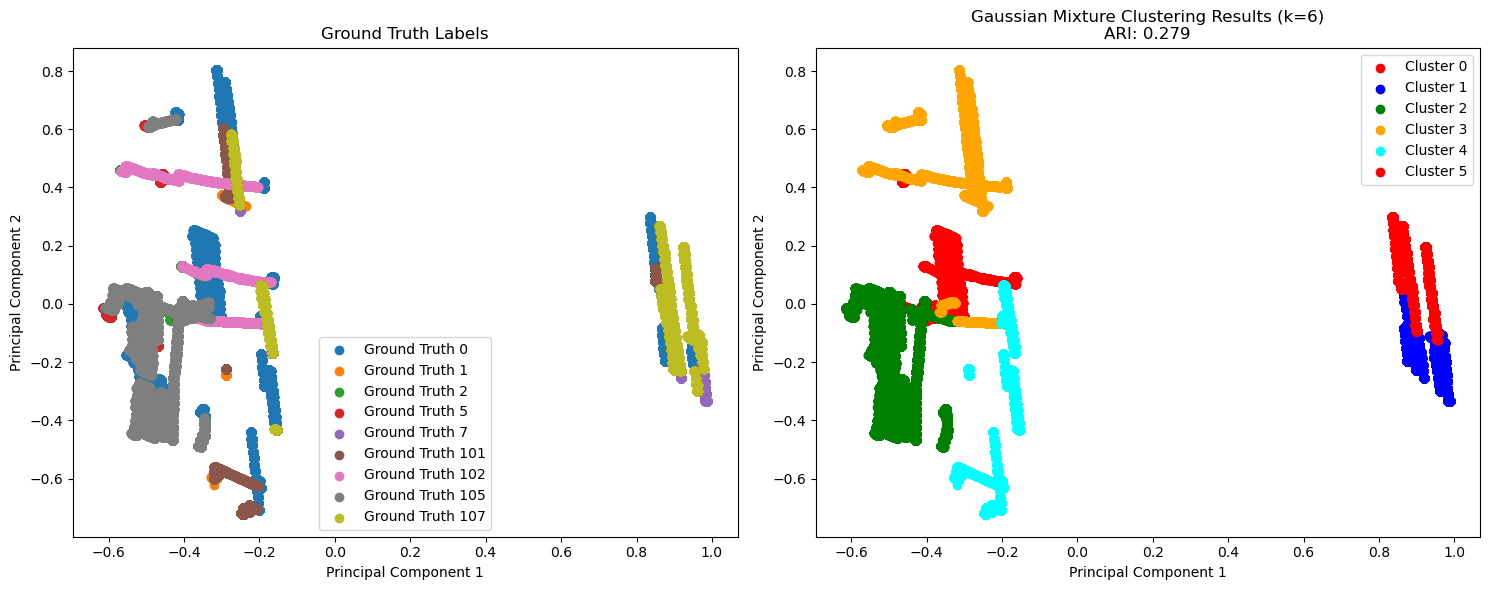

In [21]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Get unique labels in y_true
unique_labels = np.unique(y_true)

# Assign colors dynamically
color_map = plt.cm.get_cmap('tab10')

# Visualize the ground truth labels
for idx, true_label in enumerate(unique_labels):
    label_color = color_map(idx % color_map.N)
    axes[0].scatter(X_pca[y_true == true_label, 0], X_pca[y_true == true_label, 1], c=[label_color], label='Ground Truth {}'.format(int(true_label)))
axes[0].set_xlabel("Principal Component 1")
axes[0].set_ylabel("Principal Component 2")
axes[0].set_title("Ground Truth Labels")
axes[0].legend()

# Visualize the Gaussian Mixture clustering results
for cluster_label in range(k):
    axes[1].scatter(X_pca[labels == cluster_label, 0], X_pca[labels == cluster_label, 1], c=colors[cluster_label % len(colors)], label='Cluster {}'.format(cluster_label))
axes[1].set_xlabel("Principal Component 1")
axes[1].set_ylabel("Principal Component 2")
axes[1].set_title("Gaussian Mixture Clustering Results (k={})\nARI: {:.3f}".format(k, ari))
axes[1].legend()

plt.tight_layout()  # Adjust spacing between subplots
plt.show()


In [22]:
from sklearn.mixture import GaussianMixture

# Perform Gaussian Mixture clustering with the optimal number of clusters
k = 9  # Set the optimal number of clusters here
gmm = GaussianMixture(n_components=k, random_state=42)
gmm.fit(cleaned_data)
labels = gmm.predict(cleaned_data)
# Calculate Adjusted Rand Index (ARI)
ari = adjusted_rand_score(y_true, labels)

print ("Gaussian Mixture Clustering Results (k={})\nARI: {:.3f}".format(k, ari))


#silhouette_avg = silhouette_score(cleaned_data, labels)
#print(f"Silhouette score: {silhouette_avg:.4f}")

Gaussian Mixture Clustering Results (k=9)
ARI: 0.268


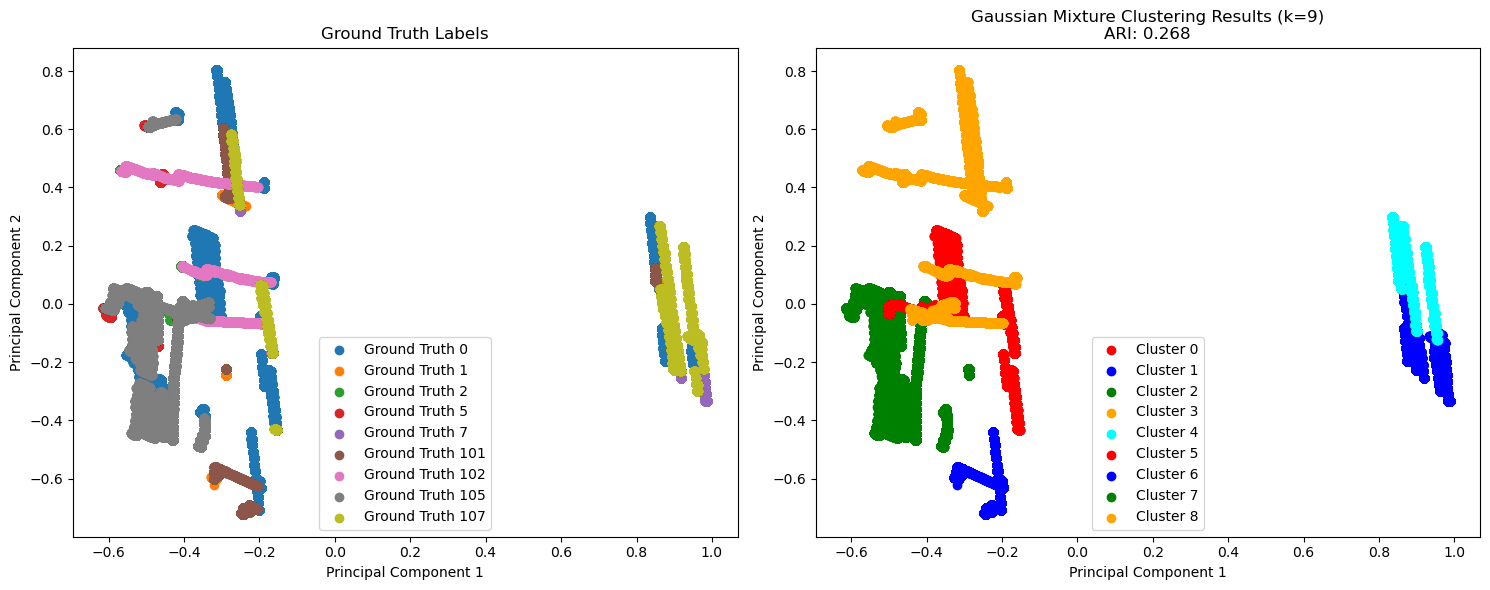

In [23]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Get unique labels in y_true
unique_labels = np.unique(y_true)

# Assign colors dynamically
color_map = plt.cm.get_cmap('tab10')

# Visualize the ground truth labels
for idx, true_label in enumerate(unique_labels):
    label_color = color_map(idx % color_map.N)
    axes[0].scatter(X_pca[y_true == true_label, 0], X_pca[y_true == true_label, 1], c=[label_color], label='Ground Truth {}'.format(int(true_label)))
axes[0].set_xlabel("Principal Component 1")
axes[0].set_ylabel("Principal Component 2")
axes[0].set_title("Ground Truth Labels")
axes[0].legend()

# Visualize the Gaussian Mixture clustering results
for cluster_label in range(k):
    axes[1].scatter(X_pca[labels == cluster_label, 0], X_pca[labels == cluster_label, 1], c=colors[cluster_label % len(colors)], label='Cluster {}'.format(cluster_label))
axes[1].set_xlabel("Principal Component 1")
axes[1].set_ylabel("Principal Component 2")
axes[1].set_title("Gaussian Mixture Clustering Results (k={})\nARI: {:.3f}".format(k, ari))
axes[1].legend()

plt.tight_layout()  # Adjust spacing between subplots
plt.show()


In [24]:
from sklearn.mixture import GaussianMixture

# Perform Gaussian Mixture clustering with the optimal number of clusters
k = 3  # Set the optimal number of clusters here
gmm = GaussianMixture(n_components=k, random_state=42)
gmm.fit(cleaned_data)
labels = gmm.predict(cleaned_data)
# Calculate Adjusted Rand Index (ARI)
ari = adjusted_rand_score(y_true, labels)

print ("Gaussian Mixture Clustering Results (k={})\nARI: {:.3f}".format(k, ari))


#silhouette_avg = silhouette_score(cleaned_data, labels)
#print(f"Silhouette score: {silhouette_avg:.4f}")

Gaussian Mixture Clustering Results (k=3)
ARI: 0.212


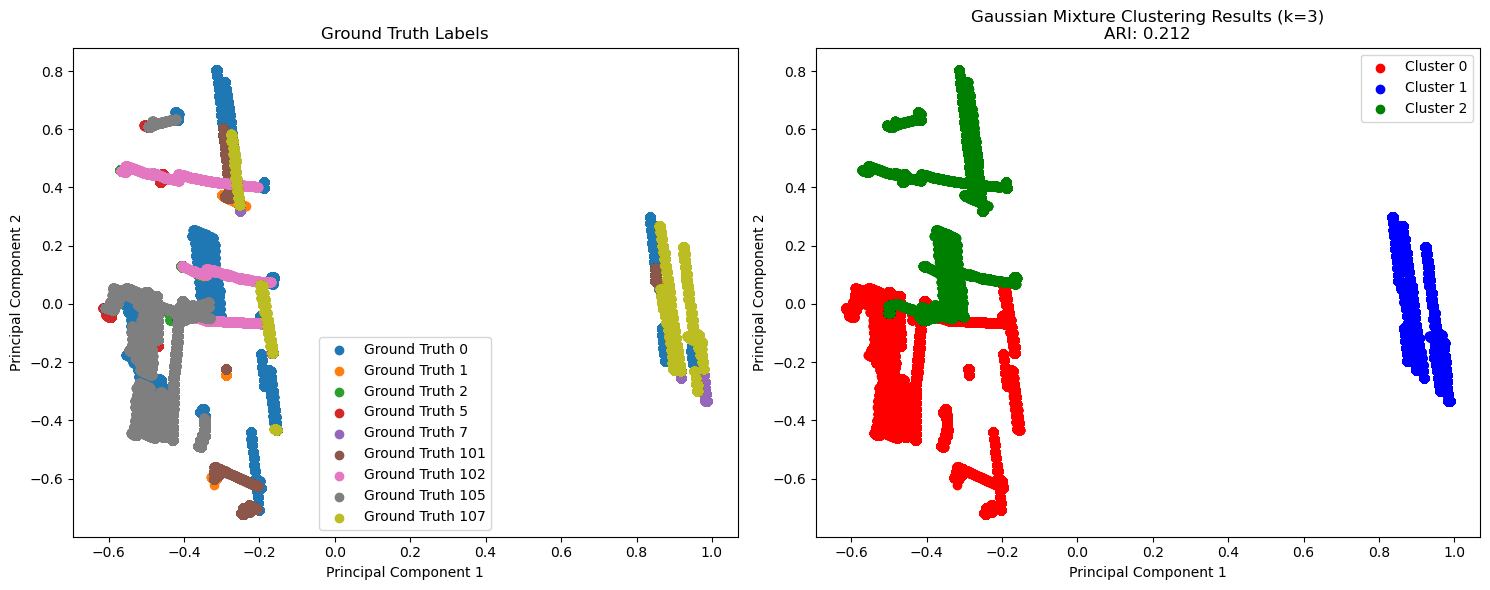

In [25]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Get unique labels in y_true
unique_labels = np.unique(y_true)

# Assign colors dynamically
color_map = plt.cm.get_cmap('tab10')

# Visualize the ground truth labels
for idx, true_label in enumerate(unique_labels):
    label_color = color_map(idx % color_map.N)
    axes[0].scatter(X_pca[y_true == true_label, 0], X_pca[y_true == true_label, 1], c=[label_color], label='Ground Truth {}'.format(int(true_label)))
axes[0].set_xlabel("Principal Component 1")
axes[0].set_ylabel("Principal Component 2")
axes[0].set_title("Ground Truth Labels")
axes[0].legend()

# Visualize the Gaussian Mixture clustering results
for cluster_label in range(k):
    axes[1].scatter(X_pca[labels == cluster_label, 0], X_pca[labels == cluster_label, 1], c=colors[cluster_label % len(colors)], label='Cluster {}'.format(cluster_label))
axes[1].set_xlabel("Principal Component 1")
axes[1].set_ylabel("Principal Component 2")
axes[1].set_title("Gaussian Mixture Clustering Results (k={})\nARI: {:.3f}".format(k, ari))
axes[1].legend()

plt.tight_layout()  # Adjust spacing between subplots
plt.show()


### SpectralClustering

In [24]:
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Initialize empty lists to store silhouette scores
silhouette_scores = []

# Define range of cluster numbers to evaluate
min_clusters = 2
max_clusters = 10

# Perform Spectral Clustering for different values of n_clusters
for n_clusters in range(min_clusters, max_clusters+1):
    # Create SpectralClustering instance
    spectral = SpectralClustering(n_clusters=n_clusters, random_state=None, n_init=10)
    
    # Fit and predict with Spectral Clustering
    labels = spectral.fit_predict(X_scaled)
    
    # Calculate silhouette score and append to the list
    silhouette_scores.append(silhouette_score(X_scaled, labels))

# Plotting the silhouette scores
plt.figure(figsize=(10, 5))
plt.plot(range(min_clusters, max_clusters+1), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')
plt.show()

# Find the optimal number of clusters based on the maximum silhouette score
optimal_n_clusters = range(min_clusters, max_clusters+1)[silhouette_scores.index(max(silhouette_scores))]

# Apply Spectral Clustering with the optimal number of clusters
spectral = SpectralClustering(n_clusters=optimal_n_clusters, random_state=None, n_init=10)
labels = spectral.fit_predict(X_scaled)

# Calculate Adjusted Rand Index (ARI)
ari = adjusted_rand_score(y_true, labels)
print("Optimal Number of Clusters:", optimal_n_clusters)
print("Adjusted Rand Index:", ari)


MemoryError: Unable to allocate 11.3 TiB for an array with shape (1245352, 1245352) and data type float64

### Birch

In [ ]:
from sklearn.cluster import Birch
from sklearn.metrics import silhouette_score

# Set the range of clusters to test
min_clusters = 3
max_clusters = 6

# Initialize silhouette scores list
silhouette_scores = []

# Fit Birch models and calculate silhouette scores for each number of clusters
for k in range(min_clusters, max_clusters+1):
    birch = Birch(n_clusters=k)
    birch.fit(X_scaled)
    labels = birch.labels_
    silhouette_scores.append(silhouette_score(X_scaled, labels))

# Find the optimal number of clusters based on the silhouette scores
optimal_k = np.argmax(silhouette_scores) + min_clusters

# Print the optimal number of clusters
print("Optimal number of clusters:", optimal_k)


In [ ]:
from sklearn.cluster import Birch

# Perform Birch clustering with the optimal number of clusters
k = 5  # Set the optimal number of clusters here
birch = Birch(n_clusters=optimal_k)
birch.fit(X_scaled)
labels = birch.labels_

# Calculate Adjusted Rand Index (ARI)
ari = adjusted_rand_score(y_true, labels)
print("Birch Clustering Results (k={})\nARI: {:.3f}".format(k, ari))

In [ ]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Visualize the ground truth labels
colors = ['pink', 'purple', 'yellow', 'orange', 'cyan']
for true_label in np.unique(y_true):
    axes[0].scatter(X_pca[y_true == true_label, 0], X_pca[y_true == true_label, 1], c=colors[int(true_label)], label='Ground Truth {}'.format(int(true_label)))
axes[0].set_xlabel("Principal Component 1")
axes[0].set_ylabel("Principal Component 2")
axes[0].set_title("Ground Truth Labels")
axes[0].legend()

# Visualize the Birch clustering results
for cluster_label in range(k):
    axes[1].scatter(X_pca[labels == cluster_label, 0], X_pca[labels == cluster_label, 1], c=colors[cluster_label], label='Cluster {}'.format(cluster_label))
axes[1].set_xlabel("Principal Component 1")
axes[1].set_ylabel("Principal Component 2")
axes[1].set_title("Birch Clustering Results (k={})\nARI: {:.3f}".format(k, ari))
axes[1].legend()

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

### Optics

In [ ]:
from sklearn.cluster import OPTICS

# Perform OPTICS clustering with the optimal number of clusters
min_samples = 5  # Set the minimum number of samples in a neighborhood
xi = 0.05  # Set the minimum steepness of the reachability plot
optics = OPTICS(min_samples=min_samples, xi=xi)
optics.fit(X_scaled)
labels = optics.labels_

# Calculate Adjusted Rand Index (ARI)
ari = adjusted_rand_score(y_true, labels)
print("OPTICS Clustering Results\nARI: {:.3f}".format(ari))

In [ ]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Visualize the ground truth labels
colors = ['pink', 'purple', 'yellow', 'orange', 'cyan']
for true_label in np.unique(y_true):
    axes[0].scatter(X_pca[y_true == true_label, 0], X_pca[y_true == true_label, 1], c=colors[int(true_label)], label='Ground Truth {}'.format(int(true_label)))
axes[0].set_xlabel("Principal Component 1")
axes[0].set_ylabel("Principal Component 2")
axes[0].set_title("Ground Truth Labels")
axes[0].legend()

# Visualize the OPTICS clustering results
for cluster_label in range(max(labels) + 1):
    axes[1].scatter(X_pca[labels == cluster_label, 0], X_pca[labels == cluster_label, 1], c=colors[cluster_label], label='Cluster {}'.format(cluster_label))
axes[1].set_xlabel("Principal Component 1")
axes[1].set_ylabel("Principal Component 2")
axes[1].set_title("OPTICS Clustering Results\nARI: {:.3f}".format(ari))
axes[1].legend()

plt.tight_layout()  # Adjust spacing between subplots
plt.show()


### Meanshift

In [10]:
from sklearn.cluster import MeanShift

# Perform MeanShift clustering
bandwidth = 1.5  # Set the bandwidth parameter
meanshift = MeanShift(bandwidth=bandwidth)
meanshift.fit(X_scaled)
labels = meanshift.labels_

# Calculate Adjusted Rand Index (ARI)
ari = adjusted_rand_score(y_true, labels)

print ("MeanShift Clustering Results\nARI: {:.3f}".format(ari))

KeyboardInterrupt: 

In [ ]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Visualize the ground truth labels
colors = ['pink', 'purple', 'yellow', 'orange', 'cyan']
for true_label in np.unique(y_true):
    axes[0].scatter(X_pca[y_true == true_label, 0], X_pca[y_true == true_label, 1], c=colors[int(true_label)], label='Ground Truth {}'.format(int(true_label)))
axes[0].set_xlabel("Principal Component 1")
axes[0].set_ylabel("Principal Component 2")
axes[0].set_title("Ground Truth Labels")
axes[0].legend()

# Visualize the MeanShift clustering results
for cluster_label in range(max(labels) + 1):
    axes[1].scatter(X_pca[labels == cluster_label, 0], X_pca[labels == cluster_label, 1], c=colors[cluster_label], label='Cluster {}'.format(cluster_label))
axes[1].set_xlabel("Principal Component 1")
axes[1].set_ylabel("Principal Component 2")
axes[1].set_title("MeanShift Clustering Results\nARI: {:.3f}".format(ari))
axes[1].legend()

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

In [11]:
from sklearn.ensemble import IsolationForest

# Create the Isolation Forest model
isolation_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)

# Fit the model to the cleaned_data
isolation_forest.fit(cleaned_data)

# Predict anomalies (1 for normal, -1 for anomalies)
anomaly_predictions = isolation_forest.predict(cleaned_data)

# Convert -1 (anomaly) predictions to 0 and 1 (normal) predictions to 1
anomaly_predictions[anomaly_predictions == 1] = 0
anomaly_predictions[anomaly_predictions == -1] = 1

# Calculate Adjusted Rand Index (ARI)
ari = adjusted_rand_score(y_true, anomaly_predictions)
print("Isolation Forest Anomaly Detection Results\nARI: {:.3f}".format(ari))


Isolation Forest Anomaly Detection Results
ARI: 0.024
